## Assigment 1

Group 2 Section 2

Abdelrahman Amr Ali Mohamed - 9010

Abdelrahman Ahmed Hafez     - 8901

Mohamed Taysser             - 8581

In [36]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import data_preprocessing
from Linear import LinearRegressor
from ridge_regression_manual import RidgeRegressor
from KNN import *

### KNN - Classifier

In [ ]:
X_train, X_valid, X_test, y_train, y_valid, y_test = prepare_data("telescope_data/telescope_data.csv")


Finding the best K in the range 1 -> 25

K=1: Accuracy=0.973
K=2: Accuracy=0.961
K=3: Accuracy=0.974
K=4: Accuracy=0.971
K=5: Accuracy=0.976
K=6: Accuracy=0.972
K=7: Accuracy=0.975
K=8: Accuracy=0.973
K=9: Accuracy=0.977
K=10: Accuracy=0.976
K=11: Accuracy=0.978
K=12: Accuracy=0.976
K=13: Accuracy=0.977
K=14: Accuracy=0.975
K=15: Accuracy=0.976
K=16: Accuracy=0.975
K=17: Accuracy=0.975
K=18: Accuracy=0.975
K=19: Accuracy=0.977
K=20: Accuracy=0.974
K=21: Accuracy=0.976
K=22: Accuracy=0.975
K=23: Accuracy=0.975
K=24: Accuracy=0.974
K=25: Accuracy=0.976

Best K=11 Accuracy=0.978


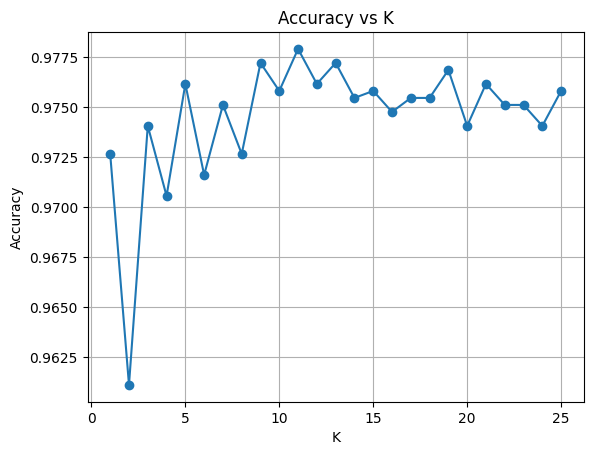

In [38]:
best_k = tune_k(X_train, y_train, X_valid, y_valid, k_range=(1, 25))

After analyzing the accuracy plot, k=11 was selected as the optimal number of neighbors

Manual KNN

In [40]:
print("\nRunning Manual KNN...")
manual_preds = manual_knn_predict(X_train, y_train, X_test, k=best_k)
evaluate_model(f"Manual KNN (k={best_k})", y_test, manual_preds)


Running Manual KNN...

Manual KNN (k=11) Results:
Accuracy: 0.979
Precision: 0.979
Recall: 0.979
F1 Score: 0.979
Confusion Matrix:
[[1831   19]
 [  42  961]]


Scikit-Learn KNN

In [39]:
print("\nRunning Scikit-Learn KNN...")
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
sk_preds = knn.predict(X_test)
evaluate_model(f"Scikit-Learn KNN (k={best_k})", y_test, sk_preds)


Running Scikit-Learn KNN...

Scikit-Learn KNN (k=11) Results:
Accuracy: 0.979
Precision: 0.979
Recall: 0.979
F1 Score: 0.979
Confusion Matrix:
[[1831   19]
 [  42  961]]


The final model performs exceptionally well, achieving a balanced F1-Score of 97.9%.

The low number of misclassifications in the confusion matrix confirms the model's high reliability.

### Linear Regression

In [23]:
# Data
x_train, t_train = data_preprocessing.get_training_data()
x_validation, t_validation = data_preprocessing.get_validation_data()
x_test, t_test = data_preprocessing.get_test_data()

In [24]:
# Array to hold the MSE and MAE for each model
losses = []
models = []

Manual Linear Regression (Direct Solution)

In [25]:
Model1 = LinearRegressor(x_train, t_train, x_train.shape[1])
Model1.calc_direct_sol()
error, mse, mae = Model1.calc_loss(x_validation, t_validation)
print(f"Validation MSE: {mse:.2f}, MAE: {mae:.2f}")
losses.append(('Linear Direct Solution', mse, mae))
models.append(Model1)

Validation MSE: 0.33, MAE: 0.42


Manual Linear Regression (Gradient Descent)

In [26]:
Model2 = LinearRegressor(x_train, t_train, x_train.shape[1])
Model2.optimize_gd(learning_rate=0.01, max_iter=1000, tolerance=0.001)
error, mse, mae = Model2.calc_loss(x_validation, t_validation)
losses.append(('Linear Gradient Descent', mse, mae))
print(f"Validation MSE: {mse:.2f}, MAE: {mae:.2f}")
models.append(Model2)

Iteration 0: MSE = 1.00, MAE = 0.79
Iteration 100: MSE = 0.39, MAE = 0.47
Iteration 200: MSE = 0.38, MAE = 0.46
Iteration 300: MSE = 0.37, MAE = 0.45
Iteration 400: MSE = 0.37, MAE = 0.45
Iteration 500: MSE = 0.37, MAE = 0.44
Iteration 600: MSE = 0.36, MAE = 0.44
Iteration 700: MSE = 0.36, MAE = 0.44
Iteration 800: MSE = 0.36, MAE = 0.44
Iteration 900: MSE = 0.36, MAE = 0.44
Validation MSE: 0.33, MAE: 0.43


In [27]:
# Chooosing best learning rate
learning_rates= [0.001, 0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.128]


Scikit-Learn Linear Regression

In [28]:
Model3 = LinearRegression()
Model3.fit(x_train, t_train)
y_val = Model3.predict(x_validation)
mse= mean_squared_error(t_validation, y_val)
mae= mean_absolute_error(t_validation, y_val)
print(f"Validation MSE: {mse:.2f}, MAE: {mae:.2f}")
losses.append(('Scikit-Learn Linear Regression', mse, mae))
models.append(Model3)

Validation MSE: 0.33, MAE: 0.42


### Lasso Regression

Scikit-Learn

In [29]:
Model4 = Lasso(alpha=0.1)
Model4.fit(x_train, t_train)
y_val = Model4.predict(x_validation)
mse= mean_squared_error(t_validation, y_val)
mae= mean_absolute_error(t_validation, y_val)
print(f"Validation MSE: {mse:.2f}, MAE: {mae:.2f}")

Validation MSE: 0.42, MAE: 0.49


Choosing best Regularization parameter

Training Lasso Regression with lambda=0.0001
Validation MSE: 0.33, MAE: 0.42 for lambda=0.0001
Training Lasso Regression with lambda=0.001
Validation MSE: 0.33, MAE: 0.42 for lambda=0.001
Training Lasso Regression with lambda=0.01
Validation MSE: 0.34, MAE: 0.43 for lambda=0.01
Training Lasso Regression with lambda=0.1
Validation MSE: 0.42, MAE: 0.49 for lambda=0.1
Training Lasso Regression with lambda=1
Validation MSE: 0.99, MAE: 0.79 for lambda=1
Training Lasso Regression with lambda=10
Validation MSE: 0.99, MAE: 0.79 for lambda=10
Training Lasso Regression with lambda=100
Validation MSE: 0.99, MAE: 0.79 for lambda=100
Training Lasso Regression with lambda=1000
Validation MSE: 0.99, MAE: 0.79 for lambda=1000
Best lambda: 0.0001 with MSE: 0.33 and MAE: 0.42


c:\Users\Abdel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.428e+02, tolerance: 1.445e+00
  model = cd_fast.enet_coordinate_descent(


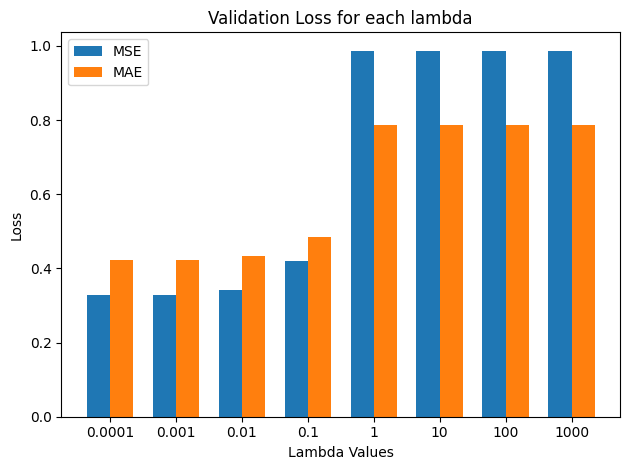

In [30]:
lambdas= [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
lassos = []
for l in lambdas:
    Model4 = Lasso(alpha=l, max_iter=10000)
    print(f"Training Lasso Regression with lambda={l}")
    Model4.fit(x_train, t_train)
    y_val = Model4.predict(x_validation)
    mse= mean_squared_error(t_validation, y_val)
    mae= mean_absolute_error(t_validation, y_val)
    print(f"Validation MSE: {mse:.2f}, MAE: {mae:.2f} for lambda={l}")
    lassos.append((l, mse, mae))


# Best lambda model
best_lasso = min(lassos, key=lambda x: x[1])
Model4 = Lasso(alpha=best_lasso[0])
Model4.fit(x_train, t_train)
print(f"Best lambda: {best_lasso[0]} with MSE: {best_lasso[1]:.2f} and MAE: {best_lasso[2]:.2f}")
losses.append(('Scikit-Learn Lasso Regression', best_lasso[1], best_lasso[2]))
models.append(Model4)

# Plotting the losses
model_names = [lassos[0] for lassos in lassos]
mse_values = [lassos[1] for lassos in lassos]
mae_values = [lassos[2] for lassos in lassos]

x = np.arange(len(model_names))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')
ax.set_ylabel('Loss')
ax.set_xlabel('Lambda Values')
ax.set_title('Validation Loss for each lambda')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
plt.tight_layout()
plt.show()


#### Ridge Regression

Choosing best Regularization parameter using direct solution

Best Ridge Regression lambda: 10 with MSE: 0.33 and MAE: 0.42


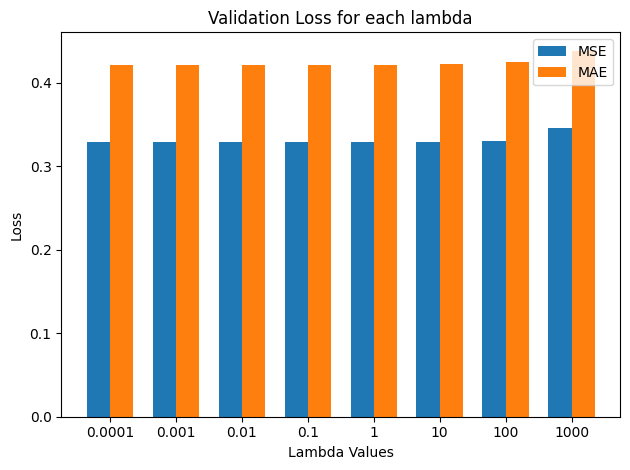

In [31]:
lambdas= [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
learning_rates= [0.001, 0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.128]

ridge_models = np.array([RidgeRegressor(x_train, t_train, lam, x_train.shape[1]) for lam in lambdas])

for model in ridge_models:
    model.closed_form()
W_closed_form= np.column_stack([model.get_weights() for model in ridge_models])
errors_closed_form= x_validation @ W_closed_form - t_validation
mse_closed_form= np.mean(errors_closed_form ** 2, axis= 0) 
mae_closed_form= np.mean(np.abs(errors_closed_form), axis= 0)

best_mse_index = np.argmin(mse_closed_form)
best_model = ridge_models[best_mse_index]
print(f"Best Ridge Regression lambda: {lambdas[best_mse_index]} with MSE: {mse_closed_form[best_mse_index]:.2f} and MAE: {mae_closed_form[best_mse_index]:.2f}")
losses.append(('Ridge Regression Closed Form', mse_closed_form[best_mse_index], mae_closed_form[best_mse_index]))
models.append(best_model)

# Plotting the losses
model_names = [my_lambda for my_lambda in lambdas]
mse_values = [mse_value for mse_value in mse_closed_form]
mae_values = [mae_value for mae_value in mae_closed_form]

x = np.arange(len(model_names))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')
ax.set_ylabel('Loss')
ax.set_xlabel('Lambda Values')
ax.set_title('Validation Loss for each lambda')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
plt.tight_layout()
plt.show()

Gradient Descent

In [32]:
model5 = RidgeRegressor(x_train, t_train, lambdas[best_mse_index], x_train.shape[1])
W_grad_descent = np.column_stack([model5.gradient_descent(lr) for lr in learning_rates])
errors_grad_descent= x_validation @ W_grad_descent - t_validation
mse_grad_descent= np.mean(errors_grad_descent ** 2, axis= 0) 
mae_grad_descent= np.mean(np.abs(errors_grad_descent), axis= 0)


best_mse_index = np.argmin(mse_grad_descent)
best_learning_rate = learning_rates[best_mse_index]
model5.gradient_descent(best_learning_rate)

print(f"Validation MSE: {mse_grad_descent[best_mse_index]:.2f} and MAE: {mae_grad_descent[best_mse_index]:.2f}")
losses.append(('Ridge Regression Gradient Descent', mse_grad_descent[best_mse_index], mae_grad_descent[best_mse_index]))
models.append(model5)

Validation MSE: 0.33 and MAE: 0.42


Scikit-Learn Ridge Regression

In [33]:
ridge_model= Ridge(alpha= 0.001, fit_intercept= True)
ridge_model.fit(x_train,t_train.ravel())
y_val= ridge_model.predict(x_validation)
mse= mean_squared_error(t_validation, y_val)
mae= mean_absolute_error(t_validation, y_val)
print(f"Validation MSE: {mse:.2f}, MAE: {mae:.2f}")
losses.append(('Scikit-Learn Ridge Regression', mse, mae))
models.append(ridge_model)

Validation MSE: 0.33, MAE: 0.42


#### Comparisons

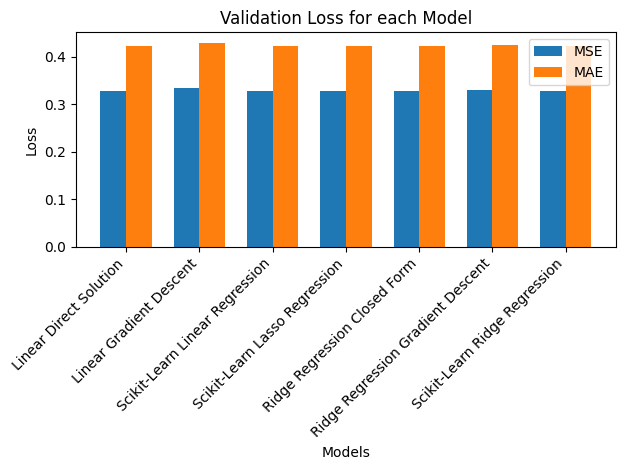

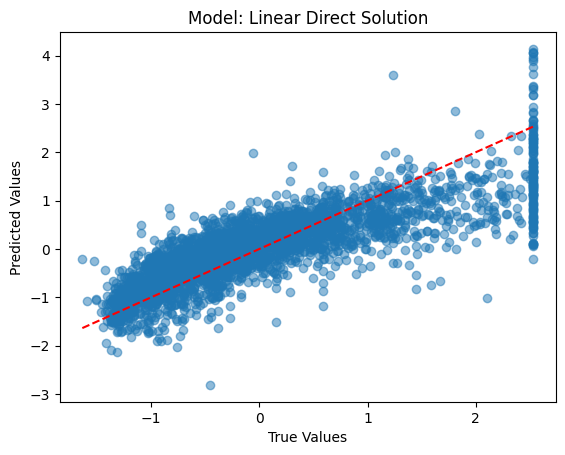

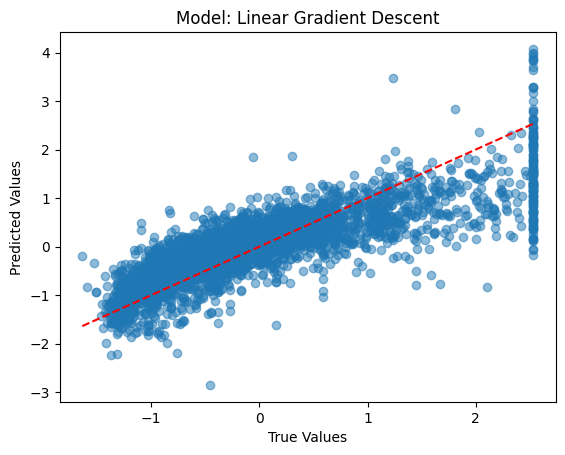

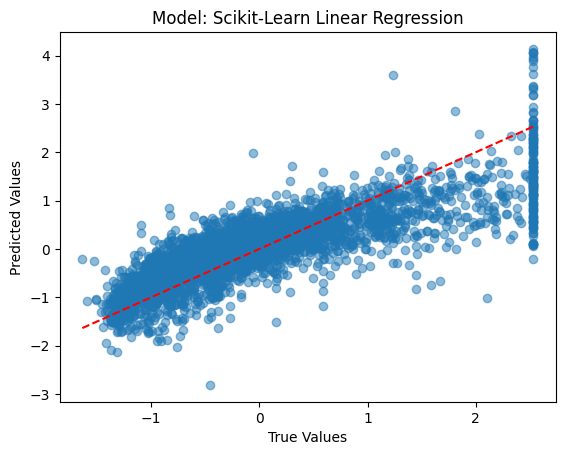

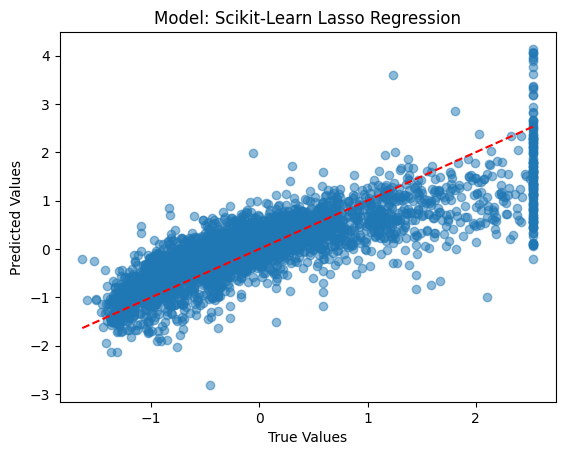

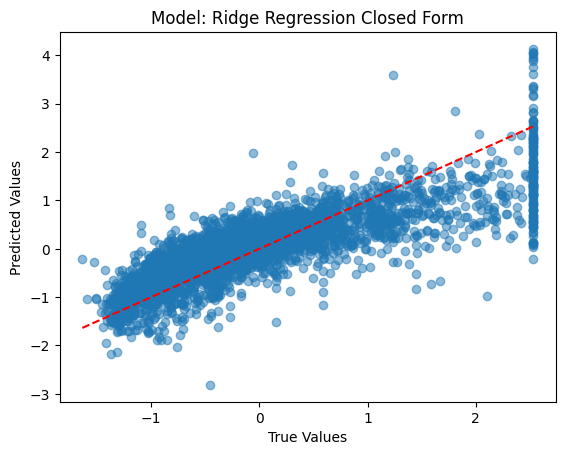

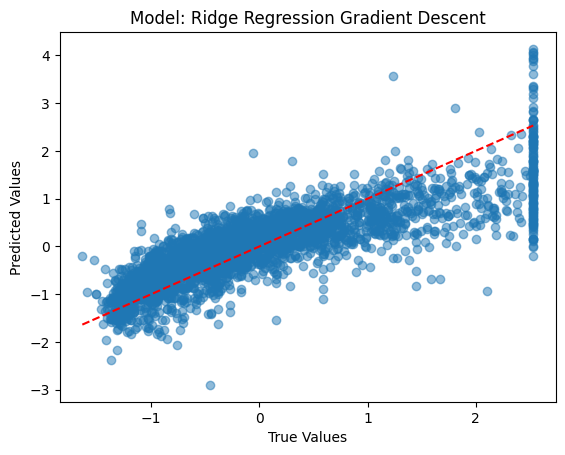

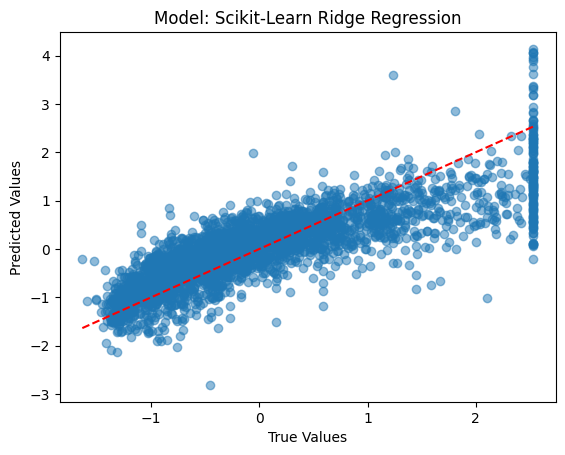

In [35]:
# Comparing all models
model_names = [loss[0] for loss in losses]
mse_values = [loss[1] for loss in losses]
mae_values = [loss[2] for loss in losses]
x = np.arange(len(model_names))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')
ax.set_ylabel('Loss')
ax.set_xlabel('Models')
ax.set_title('Validation Loss for each Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

# Scatter of each model predictions vs true values
for i, model in enumerate(models):
    if isinstance(model, (LinearRegressor, RidgeRegressor)):
        y_pred = x_validation @ model.get_weights()
    else:
        y_pred = model.predict(x_validation)
    
    plt.figure()
    plt.scatter(t_validation, y_pred, alpha=0.5)
    plt.plot([t_validation.min(), t_validation.max()], [t_validation.min(), t_validation.max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Model: {model_names[i]}')
    plt.show()

All regression models produced identical results. This indicates that the baseline linear model is already stable.

This suggests the feature weights are naturally small making the regularization penalties from Ridge and Lasso largely unnecessary.